In [2]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph,START,END

In [3]:
class Agent(TypedDict):
    n1 : int
    n2 : int
    result : int
    operation : str

In [ ]:
def nod1(state:Agent)->Agent:
    state['result']+=state['n1']+state['n2']

    return state

def nod2(state:Agent)->Agent:
    state['result']=state['n1']-state['n2']

    return state

def dicide(state:Agent)->Agent:
    if state['operation']=='+':
        return "add"
    else:
        return "minus"

In [20]:
graph=StateGraph(Agent)
graph.add_node("add",nod1)
graph.add_node("minus",nod2)
graph.add_node("addi",nod1)
graph.add_node("minusi",nod2)
graph.add_node("dec",lambda state:state)
graph.add_node("deci",lambda state:state)

graph.add_edge(START,"dec")

graph.add_conditional_edges(
    "dec",
    dicide,
    {
    "add":'add',
    "minus":"minus"
    }
)

graph.add_edge("add","deci")
graph.add_edge("minus","deci")

graph.add_conditional_edges(
    "deci",
    dicide,
    {
    "add":'addi',
    "minus":"minusi"
    }
)


graph.add_edge("addi",END)
graph.add_edge("minusi",END)
app=graph.compile()

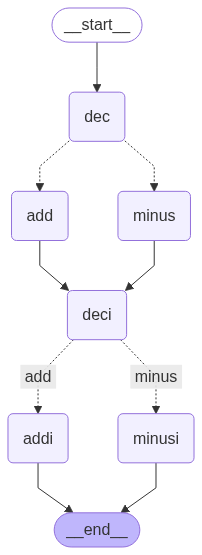

In [21]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
res=app.invoke({'n1':1,"n2":2,"operation":"+"})
res

{'n1': 1, 'n2': 2, 'result': 3, 'operation': '+'}